In [31]:
# Import our dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
#import tensorflow as tf

#  Import and read the WELFake_Dataset.csv.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
confusion = pd.read_csv("Confusion_matrix_data.csv")
confusion.head(20)


,Unnamed: 0,text,label,prediction
0,0,Barbra Streisand says she could have had a...,0,0.0
1,1,actor Daniel announced his retirement fr...,0,0.0
2,2,months after Comedy Central canceled his ...,0,0.0
3,3,France — The National Front’s leafleteer...,0,0.0
4,4,James Franco says he took the election of D...,0,0.0
5,5,#PresidentElectTrumpABSOLUTELY MUST WATCHTod...,1,1.0
6,6,"22, 2016 How To Make Briquettes From Daily W...",1,1.0
7,7,"28, 2016 | Reviews Michael Moore in New Yo...",1,1.0
8,8,=> Professor George Borjas at Harvard. Credi...,1,1.0
9,9,America Is The Loneliest Country In The Worl...,1,1.0


In [32]:
confusion=confusion.drop("Unnamed: 0", axis=1)

In [33]:
confusion["prediction"] = confusion["prediction"].astype(int)
confusion.head()

,text,label,prediction
0,Barbra Streisand says she could have had a...,0,0
1,actor Daniel announced his retirement fr...,0,0
2,months after Comedy Central canceled his ...,0,0
3,France — The National Front’s leafleteer...,0,0
4,James Franco says he took the election of D...,0,0


In [34]:
def counting(word_list, data):
    temp = pd.DataFrame(columns=['word'])
    for word in word_list:
        word_df = data[data['text'].str.contains(word, regex=True, case = False)]
        return temp

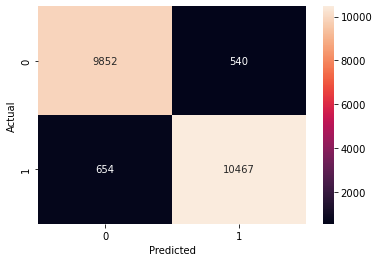

In [35]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':confusion["label"]    ,
        'y_Predicted': confusion["prediction"]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='.0f')
plt.show()

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_test = confusion["label"]
y_pred = confusion["prediction"]
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.951
Recall: 0.941
Accuracy: 0.944
F1 Score: 0.946


In [37]:
wrong = confusion.loc[confusion["label"]!=confusion["prediction"]]

In [38]:
wrong = wrong[wrong['text'].str.contains("it's", regex=True, case = False)]
wrong

,text,label,prediction
297,"""""""It's like we're testing the proposition tha...",0,1
302,"""#MemeOfTheWeek: That Article From The Onion A...",0,1
303,"""(1 fan) - Advertisement - """"China installed 2...",1,0
316,"""(CNN) The thing about women, Donald J. Trump ...",0,1
401,"""As secretary of State, she ignored repeated w...",0,1
...,...,...,...
11777,"""Watch live coverage of ceremonies in Selma co...",0,1
14220,Donald Trump is running riot in the GOP china ...,0,1
14592,"Florida’s “deceptive” solar initiative, backed...",1,0
18119,"Share on Facebook If gummy bears, peach rings ...",1,0


In [39]:
wrong["text"] = wrong["text"].str.lower()

In [40]:
#remoe stop words 
from nltk.corpus import stopwords
stop = stopwords.words('english')
wrong['text'] = wrong['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [41]:
word_count = pd.DataFrame(wrong["text"].str.split(expand=True).stack().value_counts()[:50])
words = word_count.reset_index()

In [42]:
words.head()

,index,0
0,—,298
1,trump,273
2,said,249
3,people,232
4,one,186


In [60]:
def word_counfusion(word, confusion_data):
    word_df = confusion_data[confusion_data['text'].str.contains(word, regex=True, case = False)]
    data = {'y_Actual':word_df["label"]    ,
        'y_Predicted': word_df["prediction"]
        }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    y_test = word_df["label"]
    y_pred = word_df["prediction"]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    ax = plt.axes()
    sn.heatmap(confusion_matrix, annot=True,fmt='.0f')
    ax.set_title(word + ' Matrix')
    return  precision, recall, accuracy, f1

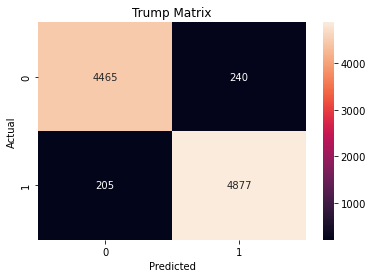

In [62]:
precision, recall, accuracy, f1 = word_counfusion("Trump", confusion)

(0.7942415730337079,
 0.9393687707641196,
 0.9069649211997967,
 0.8607305936073059)

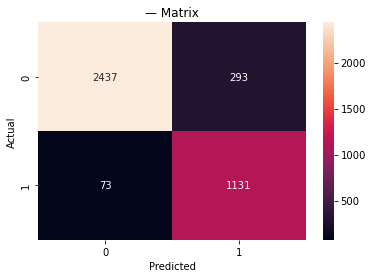

In [63]:
word_counfusion("—", confusion)

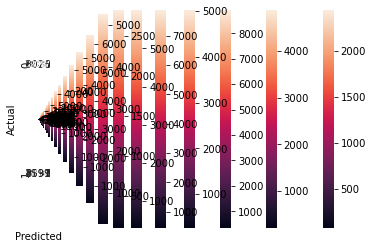

In [46]:
temp = pd.DataFrame(columns=['word'])
word_list = words["index"]
for word in word_list:
    precision, recall, accuracy, f1= word_counfusion(word, confusion)
    temp = temp.append({"word" : word, "pre": precision, "recall": recall, "accuracy": accuracy, "f1": f1}, ignore_index=True)

In [47]:
temp.head()

,word,accuracy,f1,pre,recall
0,—,0.906965,0.860731,0.794242,0.939369
1,trump,0.954532,0.956368,0.953098,0.959662
2,said,0.948571,0.931305,0.936109,0.926550
3,people,0.941392,0.944157,0.938588,0.949792
4,one,0.942033,0.945153,0.944698,0.945608


In [48]:
wrong[wrong['text'].str.contains("—", regex=True, case = False)]

,text,label,prediction
302,"""#memeoftheweek: article onion mass shootingsy...",0,1
316,"""(cnn) thing women, donald j. trump wrote, """"h...",0,1
401,"""as secretary state, ignored repeated warnings...",0,1
404,"""attorney general eric holder said friday """"pr...",0,1
434,"""california plays outsized role american agric...",0,1
464,"""donald trump addressed great faith ministries...",0,1
526,"""for months, years now, various activists jour...",0,1
540,"""german lopez:you've called war drugs failure....",0,1
621,"""it refreshing moderate """"town hall"""" libertar...",0,1
665,"""lots candidates want simplify tax code; here'...",0,1


In [49]:
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0      1
Actual                
0          9852    540
1           654  10467
